In [1]:
#这个scripts是为了找peaks附近最近的gene和de novo gene

import gffutils
import pybedtools
import os
import importlib
import pandas as pd
from gtfparse import read_gtf

/ru-auth/local/home/xwu05/.local/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/ru-auth/local/home/xwu05/.local/lib/python3.9/site-packages/pandas/core/arrays/masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


### Here's gene peaks

In [2]:

gtf_file = "/rugpfs/fs0/zhao_lab/scratch/xwu05/detect_peaks_scripts/genomes/dmel-all-r6.41.gtf"

gtf_data = pd.read_csv(gtf_file, sep='\t', comment='#', header=None, names=[
    'seqname', 'source', 'feature', 'start', 'end', 'score', 'strand', 'frame', 'attribute'
])

attributes = gtf_data['attribute'].str.extract(
    r'gene_id "(?P<gene_id>[^"]+)"; gene_symbol "(?P<gene_symbol>[^"]+)"; transcript_id "(?P<transcript_id>[^"]+)"; transcript_symbol "(?P<transcript_symbol>[^"]+)"'
)

gtf_data = pd.concat([gtf_data, attributes], axis=1).drop(columns=['attribute'])

gtf_data


,seqname,source,feature,start,end,score,strand,frame,gene_id,gene_symbol,transcript_id,transcript_symbol
0,X,FlyBase,gene,19961297,19969323,.,+,.,NaN,NaN,NaN,NaN
1,X,FlyBase,mRNA,19961689,19968479,.,+,.,FBgn0031081,Nep3,FBtr0070000,Nep3-RA
2,X,FlyBase,5UTR,19961689,19961845,.,+,.,FBgn0031081,Nep3,FBtr0070000,Nep3-RA
3,X,FlyBase,exon,19961689,19961845,.,+,.,FBgn0031081,Nep3,FBtr0070000,Nep3-RA
4,X,FlyBase,exon,19963955,19964071,.,+,.,FBgn0031081,Nep3,FBtr0070000,Nep3-RA
...,...,...,...,...,...,...,...,...,...,...,...,...
547131,2L,FlyBase,CDS,862563,864134,.,-,0,FBgn0029095,aru,FBtr0078032,aru-RC
547132,2L,FlyBase,CDS,862319,862498,.,-,0,FBgn0029095,aru,FBtr0078032,aru-RC
547133,2L,FlyBase,CDS,862169,862258,.,-,0,FBgn0029095,aru,FBtr0078032,aru-RC
547134,2L,FlyBase,stop_codon,862166,862168,.,-,0,FBgn0029095,aru,FBtr0078032,aru-RC


In [3]:
#填充
gtf_data[['gene_id', 'gene_symbol', 'transcript_id', 'transcript_symbol']] = gtf_data[['gene_id', 'gene_symbol', 'transcript_id', 'transcript_symbol']].bfill()
gtf_data


,seqname,source,feature,start,end,score,strand,frame,gene_id,gene_symbol,transcript_id,transcript_symbol
0,X,FlyBase,gene,19961297,19969323,.,+,.,FBgn0031081,Nep3,FBtr0070000,Nep3-RA
1,X,FlyBase,mRNA,19961689,19968479,.,+,.,FBgn0031081,Nep3,FBtr0070000,Nep3-RA
2,X,FlyBase,5UTR,19961689,19961845,.,+,.,FBgn0031081,Nep3,FBtr0070000,Nep3-RA
3,X,FlyBase,exon,19961689,19961845,.,+,.,FBgn0031081,Nep3,FBtr0070000,Nep3-RA
4,X,FlyBase,exon,19963955,19964071,.,+,.,FBgn0031081,Nep3,FBtr0070000,Nep3-RA
...,...,...,...,...,...,...,...,...,...,...,...,...
547131,2L,FlyBase,CDS,862563,864134,.,-,0,FBgn0029095,aru,FBtr0078032,aru-RC
547132,2L,FlyBase,CDS,862319,862498,.,-,0,FBgn0029095,aru,FBtr0078032,aru-RC
547133,2L,FlyBase,CDS,862169,862258,.,-,0,FBgn0029095,aru,FBtr0078032,aru-RC
547134,2L,FlyBase,stop_codon,862166,862168,.,-,0,FBgn0029095,aru,FBtr0078032,aru-RC


In [4]:
# 过滤基因
genes_df = gtf_data[gtf_data['feature'] == 'gene'][['seqname', 'start', 'end', 'gene_id', 'gene_symbol', 'transcript_id', 'transcript_symbol']]
genes_df.columns = ['Chromosome', 'Start', 'End', 'Gene_ID', 'Gene_Symbol', 'Transcript_ID', 'Transcript_Symbol']
genes_df

,Chromosome,Start,End,Gene_ID,Gene_Symbol,Transcript_ID,Transcript_Symbol
0,X,19961297,19969323,FBgn0031081,Nep3,FBtr0070000,Nep3-RA
67,X,20025099,20025170,FBgn0052826,tRNA:Pro-CGG-1-1,FBtr0070001,tRNA:Pro-CGG-1-1-RA
70,X,20051294,20052519,FBgn0031085,CG9570,FBtr0070002,CG9570-RA
78,X,20094398,20095767,FBgn0062565,Or19b,FBtr0070003,Or19b-RA
88,X,20133579,20138878,FBgn0031088,CG15322,FBtr0301569,CG15322-RB
...,...,...,...,...,...,...,...
546972,2L,914086,917805,FBgn0046113,GluRIIC,FBtr0336969,GluRIIC-RD
547000,2L,901491,901654,FBgn0003916,snRNA:U1:21D,FBtr0078028,snRNA:U1:21D-RA
547003,2L,877172,885141,FBgn0031292,CG15824,FBtr0332181,CG15824-RB
547074,2L,868673,869857,FBgn0020305,dbe,FBtr0078030,dbe-RA


In [5]:
genes_bed = pybedtools.BedTool.from_dataframe(genes_df)

In [6]:
# 读取peaks文件
files = [
    '/rugpfs/fs0/zhao_lab/scratch/xwu05/detect_peaks_scripts/run_model/test_coors_2L',
    '/rugpfs/fs0/zhao_lab/scratch/xwu05/detect_peaks_scripts/run_model/test_coors_2R',
    '/rugpfs/fs0/zhao_lab/scratch/xwu05/detect_peaks_scripts/run_model/test_coors_3L',
    '/rugpfs/fs0/zhao_lab/scratch/xwu05/detect_peaks_scripts/run_model/test_coors_3R',
    '/rugpfs/fs0/zhao_lab/scratch/xwu05/detect_peaks_scripts/run_model/test_coors_4',
    '/rugpfs/fs0/zhao_lab/scratch/xwu05/detect_peaks_scripts/run_model/test_coors_X'
]

dfs = [pd.read_csv(file, header=0) for file in files]
peaks_df = pd.concat(dfs, ignore_index=True)

peaks_df


,Unnamed: 0,Chromosome,Start,End,label_head,label_testis
0,2619,2L,21589454.0,21590454.0,1.0,0.0
1,12932,2L,17986000.0,17987000.0,0.0,0.0
2,9045,2L,12762000.0,12763000.0,0.0,0.0
3,16351,2L,19799559.0,19800559.0,0.0,1.0
4,9217,2L,12973000.0,12974000.0,0.0,0.0
...,...,...,...,...,...,...
123158,9372,X,13018000.0,13019000.0,0.0,0.0
123159,7291,X,10124000.0,10125000.0,0.0,0.0
123160,12943,X,4366101.0,4367101.0,1.0,1.0
123161,7293,X,10126000.0,10127000.0,0.0,0.0


In [7]:
peaks_df = peaks_df[['Chromosome', 'Start', 'End', 'label_head', 'label_testis']].dropna()
peaks_df['Start'] = peaks_df['Start'].astype(int)
peaks_df['End'] = peaks_df['End'].astype(int)

peaks_df = peaks_df.sort_values(['Chromosome', 'Start', 'End'])
peaks_df = peaks_df[(peaks_df['label_head'] != 0) | (peaks_df['label_testis'] != 0)]

peaks_bed = pybedtools.BedTool.from_dataframe(peaks_df)

genes_bed_sorted = genes_bed.sort()
peaks_bed_sorted = peaks_bed.sort()
peaks_df

,Chromosome,Start,End,label_head,label_testis
101157,4,42921,43921,1.0,1.0
100428,4,46917,47917,1.0,0.0
100610,4,55994,56994,1.0,1.0
100788,4,58626,59626,1.0,1.0
100757,4,59938,60938,1.0,1.0
...,...,...,...,...,...
115315,X,23531587,23532587,1.0,0.0
111308,X,23535060,23536060,1.0,1.0
111853,X,23535835,23536835,1.0,1.0
108820,X,23536912,23537912,1.0,1.0


In [8]:
# 最近邻基因
closest_genes = peaks_bed_sorted.closest(genes_bed_sorted) 
closest_genes

<BedTool(/tmp/pybedtools.y1sxls8v.tmp)>

In [9]:
closest_genes_df = closest_genes.to_dataframe(names=['Peak_chr', 'Peak_Start', 'Peak_End', 'label_head', 'label_testis',
                                                     'Gene_chr', 'Gene_Start', 'Gene_End', 'Gene_ID', 'Gene_Symbol', 
                                                     'Transcript_ID', 'Transcript_Symbol'])
closest_genes_df

,Peak_chr,Peak_Start,Peak_End,label_head,label_testis,Gene_chr,Gene_Start,Gene_End,Gene_ID,Gene_Symbol,Transcript_ID,Transcript_Symbol
0,2L,2124,3124,1.0,1.0,2L,7529,9484,FBgn0031208,CR11023,FBtr0475186,CR11023-RE
1,2L,5251,6251,1.0,1.0,2L,7529,9484,FBgn0031208,CR11023,FBtr0475186,CR11023-RE
2,2L,16278,17278,1.0,0.0,2L,9839,21376,FBgn0002121,l(2)gl,FBtr0078166,l(2)gl-RB
3,2L,17912,18912,1.0,1.0,2L,9839,21376,FBgn0002121,l(2)gl,FBtr0078166,l(2)gl-RB
4,2L,19117,20117,1.0,0.0,2L,9839,21376,FBgn0002121,l(2)gl,FBtr0078166,l(2)gl-RB
...,...,...,...,...,...,...,...,...,...,...,...,...
31281,X,23531587,23532587,1.0,0.0,X,23538215,23538283,FBgn0286519,mir-10404-5,FBtr0473836,mir-10404-5-RM
31282,X,23535060,23536060,1.0,1.0,X,23538215,23538283,FBgn0286519,mir-10404-5,FBtr0473836,mir-10404-5-RM
31283,X,23535835,23536835,1.0,1.0,X,23538215,23538283,FBgn0286519,mir-10404-5,FBtr0473836,mir-10404-5-RM
31284,X,23536912,23537912,1.0,1.0,X,23538215,23538283,FBgn0286519,mir-10404-5,FBtr0473836,mir-10404-5-RM


In [10]:
# 计算正负号距离 正是peak在gene左
def calculate_signed_distance(row):
    if row['Peak_End'] < row['Gene_Start']:
        return row['Gene_Start'] - row['Peak_End'] 
    elif row['Peak_Start'] > row['Gene_End']:
        return row['Gene_End'] - row['Peak_Start'] 
    else:
        return 0  

closest_genes_df['signed_distance'] = closest_genes_df.apply(calculate_signed_distance, axis=1)

In [11]:
filtered_df = closest_genes_df[(closest_genes_df['signed_distance'] > -1000) & (closest_genes_df['signed_distance'] < 1000)]
filtered_df

,Peak_chr,Peak_Start,Peak_End,label_head,label_testis,Gene_chr,Gene_Start,Gene_End,Gene_ID,Gene_Symbol,Transcript_ID,Transcript_Symbol,signed_distance
2,2L,16278,17278,1.0,0.0,2L,9839,21376,FBgn0002121,l(2)gl,FBtr0078166,l(2)gl-RB,0
3,2L,17912,18912,1.0,1.0,2L,9839,21376,FBgn0002121,l(2)gl,FBtr0078166,l(2)gl-RB,0
4,2L,19117,20117,1.0,0.0,2L,9839,21376,FBgn0002121,l(2)gl,FBtr0078166,l(2)gl-RB,0
5,2L,20749,21749,1.0,1.0,2L,9839,21376,FBgn0002121,l(2)gl,FBtr0078166,l(2)gl-RB,0
6,2L,34463,35463,0.0,1.0,2L,25402,65404,FBgn0051973,Cda5,FBtr0078163,Cda5-RA,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31213,X,23291062,23292062,1.0,0.0,X,23291450,23291518,FBgn0286518,mir-10404-4,FBtr0473833,mir-10404-4-RM,0
31214,X,23291062,23292062,1.0,0.0,X,23291549,23291671,FBgn0267523,5.8SrRNA-Psi:CR45863,FBtr0346897,5.8SrRNA-Psi:CR45863-RA,0
31215,X,23291062,23292062,1.0,0.0,X,23291700,23291729,FBgn0267524,2SrRNA:CR45864,FBtr0346898,2SrRNA:CR45864-RA,0
31284,X,23536912,23537912,1.0,1.0,X,23538215,23538283,FBgn0286519,mir-10404-5,FBtr0473836,mir-10404-5-RM,303


In [12]:
closest_genes_df.to_csv('all_closest_genes_to_peaks_signed.tsv', sep='\t', index=False)
filtered_df.to_csv('less1kbp_closest_genes_to_peaks_signed.tsv', sep='\t', index=False)


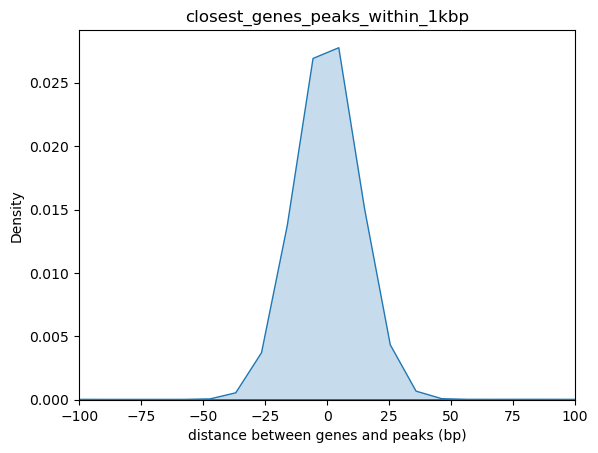

In [13]:
# density plot 
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd

sns.kdeplot(filtered_df['signed_distance'], shade=True)
plt.title('Density Plot of Distance')
plt.xlabel('distance between genes and peaks (bp)')
plt.ylabel('Density')
plt.xlim(-100, 100)
plt.title('closest_genes_peaks_within_1kbp')
plt.savefig('closest_genes_peaks_within_1kbp.pdf')
plt.show()

### Here's de novo gene list 

In [14]:
# 这个是Junhui给我的坐标denovo

denovolist = pd.read_csv('/rugpfs/fs0/zhao_lab/scratch/xwu05/detect_peaks_scripts/genomes/denovogenelist_w_location.csv', header=0)
denovolist.columns = ['Unnamed', 'Chromosome', 'Start', 'End', 'Gene']

denovolist['Start'] = denovolist['Start'].astype(int)
denovolist['End'] = denovolist['End'].astype(int)

denovolist_bed = pybedtools.BedTool.from_dataframe(denovolist[['Chromosome', 'Start', 'End', 'Gene']])

peaks_bed_sorted = peaks_bed.sort()
denovolist_bed_sorted = denovolist_bed.sort()


In [15]:
# 进行最近邻基因查找
closest_genes_denovo = peaks_bed_sorted.closest(denovolist_bed_sorted)
closest_genes_denovo


<BedTool(/tmp/pybedtools.p08w6hl9.tmp)>

In [16]:
closest_denovo_genes_df = closest_genes_denovo.to_dataframe(header=None)
closest_denovo_genes_df

,chrom,start,end,name,score,strand,thickStart,thickEnd,itemRgb
0,2L,2124,3124,1.0,1.0,2L,325522,329761,FBgn0264086
1,2L,5251,6251,1.0,1.0,2L,325522,329761,FBgn0264086
2,2L,16278,17278,1.0,0.0,2L,325522,329761,FBgn0264086
3,2L,17912,18912,1.0,1.0,2L,325522,329761,FBgn0264086
4,2L,19117,20117,1.0,0.0,2L,325522,329761,FBgn0264086
...,...,...,...,...,...,...,...,...,...
25371,X,23531587,23532587,1.0,0.0,X,21249976,21251148,FBgn0031168
25372,X,23535060,23536060,1.0,1.0,X,21249976,21251148,FBgn0031168
25373,X,23535835,23536835,1.0,1.0,X,21249976,21251148,FBgn0031168
25374,X,23536912,23537912,1.0,1.0,X,21249976,21251148,FBgn0031168


In [17]:
# 计算距离 正是peak在gene左
closest_denovo_genes_df['Distance'] = closest_denovo_genes_df.apply(
    lambda row: max(row['start'] - row['thickEnd'], row['thickStart'] - row['end']), axis=1)
closest_denovo_genes_df


,chrom,start,end,name,score,strand,thickStart,thickEnd,itemRgb,Distance
0,2L,2124,3124,1.0,1.0,2L,325522,329761,FBgn0264086,322398
1,2L,5251,6251,1.0,1.0,2L,325522,329761,FBgn0264086,319271
2,2L,16278,17278,1.0,0.0,2L,325522,329761,FBgn0264086,308244
3,2L,17912,18912,1.0,1.0,2L,325522,329761,FBgn0264086,306610
4,2L,19117,20117,1.0,0.0,2L,325522,329761,FBgn0264086,305405
...,...,...,...,...,...,...,...,...,...,...
25371,X,23531587,23532587,1.0,0.0,X,21249976,21251148,FBgn0031168,2280439
25372,X,23535060,23536060,1.0,1.0,X,21249976,21251148,FBgn0031168,2283912
25373,X,23535835,23536835,1.0,1.0,X,21249976,21251148,FBgn0031168,2284687
25374,X,23536912,23537912,1.0,1.0,X,21249976,21251148,FBgn0031168,2285764


In [18]:
filtered_denovo = closest_denovo_genes_df[closest_denovo_genes_df["Distance"] < 1000]
filtered_denovo = filtered_denovo[filtered_denovo["Distance"] > -1000]
filtered_denovo


,chrom,start,end,name,score,strand,thickStart,thickEnd,itemRgb,Distance
80,2L,324852,325852,1.0,0.0,2L,325522,329761,FBgn0264086,-330
81,2L,332221,333221,0.0,1.0,2L,329910,332335,FBgn0051921,-114
274,2L,1198069,1199069,1.0,0.0,2L,1198465,1199266,FBgn0031323,-604
509,2L,2391087,2392087,0.0,1.0,2L,2391660,2392105,FBgn0287218,-427
708,2L,3356956,3357956,1.0,1.0,2L,3357646,3358618,FBgn0031526,-310
...,...,...,...,...,...,...,...,...,...,...
24699,X,19174679,19175679,1.0,1.0,X,19171077,19174900,FBgn0047095,-221
24856,X,19889679,19890679,0.0,1.0,X,19886108,19890060,FBgn0086782,-381
24881,X,20096950,20097950,0.0,1.0,X,20096162,20096474,FBgn0260871,476
24904,X,20260119,20261119,0.0,1.0,X,20259239,20259656,FBgn0260867,463


In [19]:
filtered_denovo.to_csv('all_closest_denovo_genes_to_peaks.tsv', sep='\t', index=False)


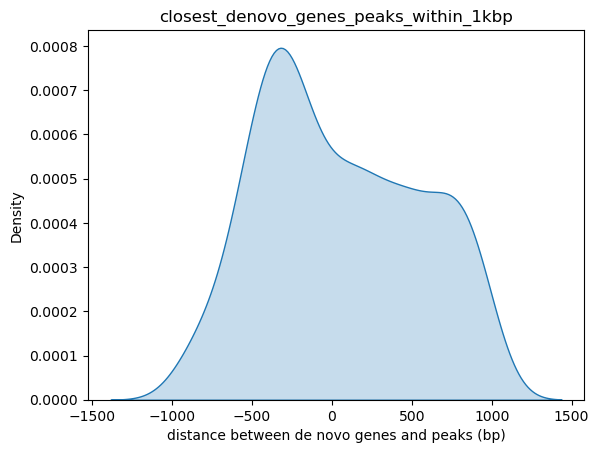

In [20]:
# density plot 
sns.kdeplot(filtered_denovo['Distance'], shade=True)
plt.title('Density Plot of Distance')
plt.xlabel('distance between de novo genes and peaks (bp)')
plt.ylabel('Density')
plt.title('closest_denovo_genes_peaks_within_1kbp')
plt.savefig('closest_denovo_genes_peaks_within_1kbp.pdf')
plt.show()
